In [3]:
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log
import numpy as np

red = "#ff0059"
green = "#38a800"
blue = "#0083ff"

sunset = ['#390080', '#3f0481', '#440882', '#4a0c83', '#500f83', '#551384', '#5b1684', '#611984', '#661b84', '#6c1e84', '#722084', '#772383', '#7d2583', '#822882', '#882b81', '#8d2d80', '#93307f', '#98327e', '#9d357d', '#a2387c', '#a73b7b', '#ac3e79', '#b14178', '#b64476', '#ba4875', '#bf4b73', '#c34f71', '#c85270', '#cc566e', '#d05a6c', '#d35e6b', '#d76269', '#db6667', '#de6a66', '#e16e64', '#e47362', '#e77761', '#ea7c60', '#ed815f', '#ef855e', '#f18a5d', '#f48f5c', '#f6945c', '#f7995c', '#f99e5c', '#faa35c', '#fca85d', '#fdad5e', '#feb260', '#ffb762', '#ffbc64', '#ffc266', '#ffc769', '#ffcc6d', '#ffd170', '#ffd674', '#ffdb79', '#ffe17d', '#ffe682', '#ffeb87', '#fff08d', '#fff592', '#fffa98', '#ffff9e']
seafoam = ['#330080', '#320a85', '#301389', '#2d1b8d', '#2b2191', '#272795', '#232d98', '#1e339b', '#16389e', '#0b3ea1', '#0043a4', '#0048a6', '#004da9', '#0053ab', '#0058ac', '#005dae', '#0062af', '#0066b1', '#006bb2', '#0070b2', '#0075b3', '#007ab3', '#007eb4', '#0083b4', '#0087b4', '#008cb3', '#0090b3', '#0094b2', '#0099b2', '#009db1', '#00a1b0', '#00a5af', '#00a9ae', '#00adac', '#00b0ab', '#00b4aa', '#00b8a8', '#00bba6', '#00bfa5', '#00c2a3', '#00c6a1', '#00c9a0', '#25cc9e', '#39cf9c', '#48d29a', '#56d599', '#62d897', '#6dda96', '#78dd94', '#82e093', '#8ce291', '#96e590', '#a0e78f', '#a9ea8f', '#b2ec8e', '#bbee8e', '#c4f08d', '#cdf38d', '#d6f58e', '#def78e', '#e7f98f', '#effb91', '#f7fd92', '#ffff94']
america = ['#ff0000', '#ff0a00', '#ff1300', '#ff1a00', '#ff2000', '#ff2500', '#ff2a00', '#ff2f00', '#ff3400', '#ff3800', '#ff3d00', '#ff4100', '#ff4600', '#ff4a00', '#ff4e00', '#ff5200', '#ff5700', '#ff5b00', '#ff5f00', '#ff6300', '#ff6700', '#ff6b00', '#ff6f00', '#ff7300', '#ff7700', '#ff7b00', '#ff7f00', '#ff8300', '#ff8700', '#fe8b00', '#fc8f00', '#fa9300', '#f79700', '#f59a00', '#f39e00', '#f0a200', '#eda600', '#eaaa00', '#e7ad00', '#e4b100', '#e0b500', '#ddb800', '#d9bc00', '#d5c000', '#d1c300', '#ccc700', '#c8ca00', '#c3ce00', '#bed100', '#b8d400', '#b2d800', '#acdb00', '#a6de00', '#9fe100', '#98e500', '#90e800', '#87eb00', '#7eee00', '#74f100', '#68f400', '#5bf700', '#4bfa00', '#34fc00', '#00ff00']
glacier = ['#610022', '#630428', '#66092e', '#680e34', '#6a123a', '#6d1640', '#6f1a45', '#701e4b', '#722151', '#742557', '#76295d', '#772c63', '#783069', '#7a336e', '#7b3774', '#7c3b7a', '#7d3e80', '#7e4285', '#7e468b', '#7f4a90', '#7f4d96', '#7f519b', '#8055a1', '#8059a6', '#805dab', '#7f61b0', '#7f65b5', '#7f69b9', '#7e6dbe', '#7e71c2', '#7d75c7', '#7c79cb', '#7b7ecf', '#7a82d3', '#7986d7', '#778ada', '#768fdd', '#7493e1', '#7397e4', '#719ce7', '#6fa0e9', '#6ea4ec', '#6ca9ee', '#6aadf1', '#69b1f3', '#67b6f5', '#66baf6', '#64bef8', '#63c3f9', '#62c7fa', '#61cbfb', '#61d0fc', '#60d4fd', '#61d8fe', '#61dcfe', '#62e0ff', '#63e4ff', '#65e8ff', '#68ecff', '#6af0ff', '#6ef4fe', '#71f8fe', '#76fbfe', '#7afffd']
matplotgood = (['#c9f820', '#bdf730', '#b1f53c', '#a4f346', '#97f14f', '#8af057', '#7ced5f', '#6deb65', '#5ce96c', '#4ae672', '#32e478', '#00e17d', '#00de82', '#00db87', '#00d88c', '#00d590', '#00d294', '#00ce98', '#00cb9c', '#00c79f', '#00c3a3', '#00bfa6', '#00bba8', '#00b7ab', '#00b3ad', '#00afaf', '#00abb1', '#00a7b2', '#00a2b4', '#009eb5', '#0099b6', '#0095b6', '#0090b6', '#008bb6', '#0087b6', '#0082b6', '#007db5', '#0079b4', '#0074b3', '#006fb1', '#006ab0', '#0066ae', '#0061ac', '#005ca9', '#0057a7', '#0053a4', '#004ea1', '#004a9e', '#05459a', '#124097', '#1a3c93', '#20378f', '#24338b', '#272f86', '#2a2a82', '#2c267d', '#2d2279', '#2e1d74', '#2f196f', '#30156a', '#301065', '#300b5f', '#30065a', '#2f0255'])
rainbow = ['#ffa200', '#f9a600', '#f2ab00', '#eaaf00', '#e2b400', '#d9b800', '#cfbd00', '#c4c100', '#b9c51c', '#adc930', '#a0cc40', '#92cf4f', '#83d25d', '#72d56a', '#60d777', '#49d984', '#2ada91', '#00db9d', '#00dcaa', '#00dcb6', '#00dcc1', '#00dbcd', '#00dad8', '#00d9e2', '#00d7ec', '#00d5f5', '#00d3fe', '#00d0ff', '#00cdff', '#00caff', '#13c7ff', '#3cc3ff', '#54c0ff', '#67bcff', '#77b8ff', '#86b4ff', '#93b0ff', '#a0acff', '#aca9ff', '#b7a5ff', '#c1a1ff', '#cb9eff', '#d49aff', '#dd97ff', '#e594ff', '#ec91fa', '#f38ff1', '#fa8ce8', '#ff8ade', '#ff89d3', '#ff87c8', '#ff86bd', '#ff86b2', '#ff85a6', '#ff869a', '#ff878e', '#ff8882', '#ff8a76', '#ff8c69', '#ff8f5d', '#ff924f', '#ff9641', '#ff9a32', '#ff9e20']
magma = ['#050019', '#08011c', '#0b021f', '#0f0322', '#130525', '#170728', '#1b0a2b', '#200d2e', '#240f31', '#291233', '#2d1536', '#321839', '#371b3b', '#3c1e3e', '#412040', '#462342', '#4b2644', '#502a47', '#552d49', '#5a304b', '#5f334d', '#64364e', '#693a50', '#6e3d52', '#734154', '#784455', '#7d4857', '#824b58', '#874f5a', '#8c535b', '#91575d', '#965b5e', '#9b5f5f', '#9f6361', '#a46762', '#a86c63', '#ad7065', '#b17466', '#b67968', '#ba7e69', '#be826b', '#c2876c', '#c68c6e', '#ca9170', '#ce9672', '#d19b73', '#d5a076', '#d8a578', '#dbaa7a', '#dfaf7d', '#e2b57f', '#e5ba82', '#e7c085', '#eac588', '#edcb8c', '#efd08f', '#f1d693', '#f3db97', '#f5e19c', '#f7e7a0', '#f9eda5', '#fbf2aa', '#fdf8af', '#fefeb4']
wpm = 0
glacier2 = ['#490027', '#4c002d', '#4e0033', '#500039', '#52003f', '#540045', '#56004b', '#570051', '#590657', '#5a0d5c', '#5b1462', '#5d1968', '#5e1f6e', '#5e2473', '#5f2979', '#602d7e', '#613283', '#613789', '#613b8e', '#624093', '#624597', '#62499c', '#624ea1', '#6152a5', '#6157a9', '#615cae', '#6060b1', '#5f65b5', '#5f6ab9', '#5e6ebd', '#5d73c0', '#5d78c3', '#5c7dc6', '#5b81c9', '#5a86cc', '#598bcf', '#598fd1', '#5894d3', '#5898d6', '#589dd8', '#58a2da', '#58a6dc', '#58abdd', '#59afdf', '#5ab4e0', '#5bb8e2', '#5dbde3', '#5fc1e4', '#62c5e5', '#64cae6', '#68cee7', '#6bd2e8', '#6fd6e9', '#73daea', '#77deeb', '#7ce2eb', '#81e6ec', '#86eaed', '#8beeed', '#91f2ee', '#96f6ef', '#9cfaef', '#a2fdf0', '#a8fff1']


In [3]:

bistroke_times = {}
bistroke_freq = {}
bigrams = []

with open(f"nstrokes/bistrokes_0.txt") as file:
    for l in file:
        layout, bigram, freq, *times = l.split("\t")

        bigrams.append(bigram)
        bistroke_freq[(layout,bigram)] = int(freq)
        bistroke_times[(layout,bigram)] = [list(map(int,t.strip()[1:-1].split(", "))) for t in times]

2.25
4.25
1.25
1.0
1.0
2.25
4.5
6.0
4.75
0.75
2.0
5.0
2.5
2.0
4.0
4.0
2.75
6.75
2.75
1.75
7.25
0.75
2.0
5.75
5.75
0
6.0
4.75
1.75
6.25
5.0
4.0
1.0
1.25
5.25
1.25
2.75
7.25
1.25
6.75
3.5
5.75
2.75
5.75
2.0
3.0
1.75
8.0
5.5
3.25
5.0
0.0
3.0
5.75
7.75
2.25
7.0
1.25
8.25
0
2.75
2.25
6.0
4.0
1.25
5.75
5.75
6.25
1.25
2.25
5.5
0.75
5.0
1.25
0.0
5
6.75
1.0
0.25
4.75
7.75
3.75
4.25
8.5
7.5
0.25
7
1.75
4.25
5.75
2
1.0
1.25
3.0
6.75
2.25
8.0
3.0
4.5
4.25
7.75
5.25
5.5
5.25
2.0
6.75
2.25
6.75
0.0
4.75
0.25
0.75
8.75
8
4.0
6.0
3.0
4.25
0
0.0
8.0
6.5
0.25
4.75
4.25
3.75
3.75
2.25
4.75
6.25
1.25
1.25
1
5.0
2.75
5.25
2.0
5.75
2.25
4.75
1.5
6.75
4.0
7.0
4.0
5.25
1.25
1.0
4.75
4.75
3.25
2.25
1.0
0.0
2.75
3.75
4.75
0.25
0.75
7.5
5.25
2.0
2.0
3.0
4.75
0.0
0.75
3.0
3.75
0.0
5.75
6.5
3.25
6.75
4.25
1.5
3.0
6.0
6.25
7.0
6.5
7
2.75
3.25
0.0
2.5
2.25
8.25
2.5
3
3.5
3.75
8.75
0
7.0
6
1.5
7
5
5.25
3.75
3.0
8
1.25
1.0
2.25
5.5
2.75
4.75
6.5
7.0
0.5
4.5
0.5
1.75
6
1.75
3.0
0.75
2.0
3.5
2.0
7
7.0
6.25
3.25
5.5
0
5.

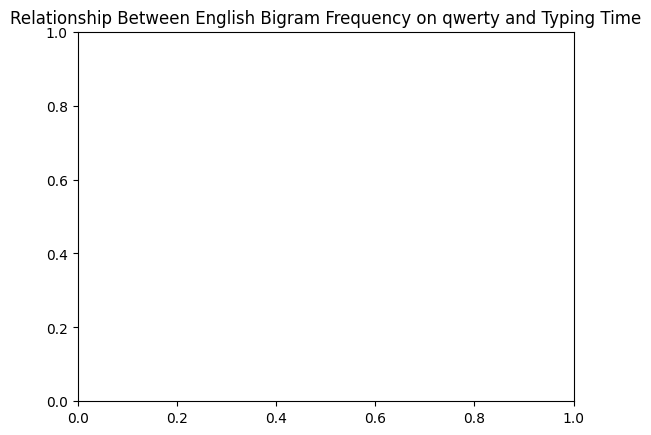

In [ ]:
%matplotlib inline
import classifier

freqs = []
times = []
c = []
added = []

mn, mx = 10000, -10000
layout = "qwerty"

title = f"Relationship Between English Bigram Frequency on {layout} and Typing Time"
plt.title(title)

for bg in bigrams:
    if not any(
        [c in '!@#$%^&*()QWERTYUIOP{}|ASDFGHJKL:\"ZXCVBNM<>?' for c in bg]
    ):
        if (layout,bg) in bistroke_freq and classifier.same_finger(bg) == False:
            added.append(bg)
            time_data = [t[1] for t in bistroke_times[(layout,bg)] if t[0] > 100]
            x_val = bistroke_freq[(layout,bg)]
            y_val = sum(time_data)/len(time_data)
            print(classifier.get_dx(bg))
            c.append(classifier.get_dx(bg))
            freqs.append(x_val)
            times.append(y_val)
            plt.annotate(bg, xy=(x_val, y_val))


In [4]:
%matplotlib qt

def log_func(x, a, b, c):
    return a * np.log(x + b) + c


#viv = ['#44105b', '#441562', '#441a68', '#441f6e', '#432374', '#42287a', '#412d80', '#3f3185', '#3d368b', '#3b3b90', '#374094', '#334599', '#2e4a9d', '#284fa1', '#2054a4', '#155aa7', '#005faa', '#0064ad', '#0069af', '#006fb1', '#0074b2', '#0079b3', '#007eb4', '#0083b4', '#0089b4', '#008eb4', '#0093b3', '#0097b2', '#009cb0', '#00a1af', '#00a6ad', '#00aaaa', '#00aea7', '#00b3a5', '#00b7a1', '#00bb9e', '#00be9a', '#00c296', '#00c592', '#00c98d', '#24cc88', '#3ecf84', '#51d27e', '#61d479', '#71d774', '#7fd96e', '#8ddb69', '#9add63', '#a7df5e', '#b3e058', '#c0e252', '#cce34d', '#d8e448', '#e3e544']
viv = list(reversed(['#fff829', '#f4f730', '#e8f737', '#ddf63f', '#d1f546', '#c5f34d', '#b9f254', '#acf15b', '#a0ef62', '#92ed68', '#85ec6e', '#76ea74', '#66e77a', '#55e580', '#41e385', '#24e08b', '#00dd90', '#00da95', '#00d799', '#00d49e', '#00d1a2', '#00cda6', '#00caaa', '#00c6ae', '#00c2b1', '#00beb4', '#00bab7', '#00b6ba', '#00b2bc', '#00adbf', '#00a9c0', '#00a4c2', '#00a0c3', '#009bc4', '#0096c5', '#0091c6', '#008dc6', '#0088c6', '#0083c5', '#007ec4', '#0079c3', '#0074c2', '#006fc0', '#0069be', '#0064bc', '#005fb9', '#145ab6', '#2155b3', '#2950b0', '#304bac', '#3547a8', '#3942a4', '#3d3d9f', '#40389b', '#423396', '#442f91', '#462a8b', '#472586', '#482080', '#491c7a', '#491775', '#49116f', '#490c68', '#490562']))
#viv = ['#440256', '#44055a', '#45095e', '#450c61', '#451065', '#451369', '#45166d', '#441970', '#441c74', '#441f77', '#43217b', '#42247e', '#422781', '#412a85', '#402d88', '#3e308b', '#3d338e', '#3b3691', '#3a3894', '#383b97', '#353e99', '#33419c', '#30449e', '#2d47a1', '#294aa3', '#244da5', '#1f50a7', '#1853a9', '#0f56ab', '#0059ad', '#005cae', '#005fb0', '#0063b1', '#0066b2', '#0069b4', '#006cb5', '#006fb5', '#0072b6', '#0075b7', '#0078b7', '#007bb8', '#007eb8', '#0081b8', '#0084b8', '#0087b8', '#008ab8', '#008db7', '#0090b7', '#0093b6', '#0096b5', '#0098b5', '#009bb4', '#009eb3', '#00a1b1', '#00a3b0', '#00a6af', '#00a9ad', '#00abac', '#00aeaa', '#00b0a8', '#00b2a6', '#00b5a4', '#00b7a2', '#00b9a0', '#00bc9d', '#00be9b', '#00c099', '#00c296', '#00c493', '#00c691', '#00c88e', '#00ca8b', '#00cc88', '#00cd85', '#18cf82', '#2ed17f', '#3dd27b', '#4ad478', '#55d575', '#5fd671', '#69d86e', '#72d96a', '#7bda66', '#83db63', '#8bdc5f', '#93dd5b', '#9bde57', '#a3df53', '#abe04f', '#b2e14a', '#b9e246', '#c1e242', '#c8e33e', '#cfe339', '#d6e435', '#dde431', '#e4e52c', '#ebe528', '#f1e624']
#viv = list(reversed(['#fff829', '#f4f730', '#e8f737', '#ddf63f', '#d1f546', '#c5f34d', '#b9f254', '#acf15b', '#a0ef62', '#92ed68', '#85ec6e', '#76ea74', '#66e77a', '#55e580', '#41e385', '#24e08b', '#00dd90', '#00da95', '#00d799', '#00d49e', '#00d1a2', '#00cda6', '#00caaa', '#00c6ae', '#00c2b1', '#00beb4', '#00bab7', '#00b6ba', '#00b2bc', '#00adbf', '#00a9c0', '#00a4c2', '#00a0c3', '#009bc4', '#0096c5', '#0091c6', '#008dc6', '#0088c6', '#0083c5', '#007ec4', '#0079c3', '#0074c2', '#006fc0', '#0069be', '#0064bc', '#005fb9', '#145ab6', '#2155b3', '#2950b0', '#304bac', '#3547a8', '#3942a4', '#3d3d9f', '#40389b', '#423396', '#442f91', '#462a8b', '#472586', '#482080', '#491c7a', '#491775', '#49116f', '#490c68', '#490562']))
#magma = ['#ffff85', '#fffa7e', '#fff378', '#ffed72', '#ffe66c', '#ffe067', '#ffd962', '#ffd35e', '#ffcd5a', '#ffc656', '#ffc053', '#ffba50', '#ffb44e', '#ffad4d', '#fea74b', '#fca14b', '#f99b4a', '#f6954a', '#f38f4a', '#f0894b', '#ed844b', '#ea7e4c', '#e6784d', '#e2734e', '#de6e50', '#da6851', '#d66352', '#d25e53', '#cd5955', '#c85456', '#c34f57', '#bf4b58', '#b94659', '#b4425a', '#af3d5b', '#aa395c', '#a4355d', '#9e315e', '#992d5e', '#93295f', '#8d255f', '#872160', '#811d60', '#7b1a60', '#751660', '#6f125f', '#690e5f', '#63095f', '#5d055e', '#57015d', '#51005c', '#4c005b', '#46005a', '#400059', '#3a0057', '#350056', '#2f0054', '#2a0052', '#250050', '#20004e', '#1c004b', '#180049', '#140046', '#110043']
# magma = ['#fcf9bb', '#fbf6b8', '#faf2b5', '#f9efb2', '#f8ecaf', '#f7e8ac', '#f6e5aa', '#f4e2a7', '#f3dea5', '#f2dba2', '#f1d8a0', '#efd59e', '#eed19b', '#ecce99', '#ebcb97', '#e9c895', '#e8c593', '#e6c191', '#e5be8f', '#e3bb8e', '#e1b88c', '#dfb58a', '#deb289', '#dcaf87', '#daac86', '#d8a984', '#d6a683', '#d4a381', '#d2a080', '#d09d7f', '#ce9a7e', '#cb977d', '#c9947b', '#c7917a', '#c58f79', '#c28c78', '#c08977', '#bd8676', '#bb8475', '#b88174', '#b67e73', '#b37c72', '#b17972', '#ae7771', '#ac7470', '#a9716f', '#a66f6e', '#a36d6d', '#a16a6c', '#9e686c', '#9b656b', '#98636a', '#956169', '#925e68', '#905c67', '#8d5a66', '#8a5865', '#875564', '#845364', '#815163', '#7e4f62', '#7b4d61', '#784b60', '#75495f', '#72475e', '#6f455d', '#6c435b', '#69415a', '#663f59', '#633d58', '#603b57', '#5d3956', '#5a3754', '#563553', '#533352', '#503251', '#4d304f', '#4a2e4e', '#472c4c', '#442b4b', '#41294a', '#3e2748', '#3c2547', '#392445', '#362244', '#332042', '#301f40', '#2d1d3f', '#2a1b3d', '#271a3b', '#25183a', '#221738', '#1f1536', '#1d1334', '#1a1232', '#171031', '#150f2f', '#120d2d', '#100c2b']
magma_sharp = ['#15003d', '#190240', '#1d0342', '#220545', '#260747', '#2b0a4a', '#2f0c4c', '#340f4e', '#391150', '#3e1352', '#431653', '#481855', '#4d1a56', '#521c58', '#571f59', '#5c215a', '#61235b', '#66265c', '#6b285d', '#712a5d', '#762d5e', '#7b2f5e', '#80325f', '#85355f', '#8a375f', '#8f3a5f', '#943d5f', '#99405f', '#9e435e', '#a3465e', '#a84a5d', '#ad4d5d', '#b1505c', '#b6545b', '#ba575a', '#be5b59', '#c35f58', '#c76357', '#cb6756', '#cf6b55', '#d36f54', '#d67453', '#da7852', '#dd7c51', '#e0814f', '#e4864e', '#e68a4d', '#e98f4d', '#ec944c', '#ee994b', '#f19e4b', '#f3a34b', '#f5a94b', '#f6ae4c', '#f8b34d', '#f9b94e', '#fbbe50', '#fcc352', '#fdc954', '#fdce57', '#fed45b', '#feda5e', '#fedf62', '#fee567']
new_magma = list(reversed(['#fef7a6', '#fff4a0', '#fff19a', '#ffee94', '#ffeb8f', '#ffe789', '#ffe484', '#ffe17f', '#ffdd7b', '#ffd976', '#ffd672', '#ffd26e', '#ffce6a', '#ffca67', '#ffc664', '#ffc262', '#ffbf60', '#ffbb5e', '#ffb75d', '#ffb35c', '#ffaf5b', '#ffab5b', '#ffa75b', '#ffa35c', '#ff9f5c', '#ff9b5d', '#ff975e', '#ff9360', '#ff9061', '#ff8c63', '#ff8864', '#ff8566', '#ff8168', '#ff7e6a', '#ff7a6c', '#ff776e', '#ff736f', '#ff7071', '#ff6d73', '#ff6a75', '#fe6776', '#fb6478', '#f8617a', '#f55e7b', '#f25c7c', '#ef597e', '#eb567f', '#e85480', '#e45281', '#e04f82', '#dd4d83', '#d94b84', '#d54884', '#d14685', '#cd4485', '#c94285', '#c54085', '#c13e85', '#bd3d85', '#b83b85', '#b43984', '#b03784', '#ac3683', '#a83483', '#a33282', '#9f3181', '#9b2f80', '#962d7e', '#922c7d', '#8e2a7b', '#89297a', '#852778', '#812676', '#7d2574', '#782372', '#742270', '#70206e', '#6c1f6b', '#681d69', '#641c66', '#5f1b64', '#5b1961', '#57185e', '#53175b', '#4f1558', '#4b1455', '#481352', '#44114e', '#40104b', '#3c0f48', '#380d44', '#350c41', '#310b3d', '#2e0a39', '#2a0836', '#260732', '#23062e', '#20062b', '#1c0527']))
dusk = ['#1f0005', '#220006', '#250008', '#29000b', '#2c000d', '#2f0010', '#320013', '#350016', '#380019', '#3b001d', '#3e0020', '#400024', '#430028', '#46002c', '#480030', '#4b0034', '#4d0039', '#50003d', '#520042', '#540047', '#56004b', '#580150', '#5a0355', '#5c055a', '#5e085f', '#5f0c65', '#610f6a', '#62126f', '#631674', '#641979', '#651c7f', '#661f84', '#672389', '#68268e', '#692993', '#692d99', '#69309e', '#6a34a2', '#6a37a7', '#6a3bac', '#693fb1', '#6942b5', '#6946ba', '#684abe', '#674ec3', '#6752c7', '#6656cb', '#655acf', '#635ed2', '#6262d6', '#6166d9', '#5f6adc', '#5d6edf', '#5c72e2', '#5a77e5', '#587be8', '#567fea', '#5483ec', '#5288ee', '#4f8cf0', '#4d90f2', '#4c94f4', '#4a98f5', '#489df6', '#47a1f8', '#46a5f9', '#45a9f9', '#45adfa', '#46b1fb', '#47b5fb', '#48b9fc', '#4abdfc', '#4dc0fc', '#51c4fc', '#55c8fc', '#59ccfc', '#5ecffc', '#63d3fc', '#69d6fc', '#6fd9fc', '#75ddfb', '#7ce0fb', '#82e3fb', '#89e6fb', '#90e9fb', '#98ecfb', '#9feffb', '#a6f1fb', '#aef4fb', '#b6f7fc', '#bdf9fc', '#c5fcfd']
lili = ['#fefba4', '#ecfca2', '#d8fca3', '#c2fca8', '#aafbaf', '#91fab8', '#76f7c2', '#57f4cc', '#31f0d7', '#00ebe1', '#00e5eb', '#00dff3', '#00d8fa', '#00d0ff', '#00c8ff', '#00bfff', '#0ab6ff', '#31adff', '#45a4ff', '#539bff', '#5e92ff', '#6789fa', '#6e80f3', '#7378ec', '#7870e4', '#7a68db', '#7c60d2', '#7d59c8', '#7d52bf', '#7c4bb5', '#7a45ab', '#773fa1', '#743998', '#71338e', '#6d2e85', '#68297c', '#632474', '#5d1f6b', '#581b63', '#52175b', '#4b1353', '#450f4c', '#3e0b45', '#37083e', '#310637', '#2a0430', '#230229', '#1c0123', '#16011c', '#0f0015']
based_magma = ['#f9ffb4', '#fbfbac', '#fcf7a4', '#fef39c', '#ffee94', '#ffea8d', '#ffe586', '#ffe07f', '#ffdb78', '#ffd672', '#ffd16d', '#ffcc68', '#ffc764', '#ffc160', '#ffbc5d', '#ffb75b', '#ffb25a', '#ffac59', '#ffa759', '#ffa259', '#ff9d5a', '#ff975c', '#ff925e', '#ff8d60', '#ff8962', '#ff8465', '#ff7f68', '#ff7b6b', '#ff766f', '#ff7272', '#ff6e75', '#ff6a79', '#fe667c', '#fb627f', '#f75f82', '#f45c85', '#f05889', '#ec568c', '#e8538e', '#e35091', '#df4e94', '#da4b96', '#d64999', '#d1479b', '#cc459d', '#c7439f', '#c242a0', '#bd40a2', '#b83fa3', '#b33da5', '#ae3ca6', '#a83ba6', '#a339a7', '#9e38a7', '#9937a7', '#9336a7', '#8e35a7', '#8934a7', '#8433a6', '#7e32a5', '#7931a4', '#7430a3', '#6f2fa2', '#6a2ea0', '#652e9e', '#602d9c', '#5b2c9a', '#572b98', '#522a95', '#4d2993', '#492890', '#44288d', '#40278a', '#3c2687', '#372583', '#332480', '#2f237c', '#2b2278', '#272274', '#242171', '#20206d', '#1c1f68', '#191e64', '#151d60', '#121c5c', '#0e1b57', '#0b1a53', '#08194f', '#05174a', '#031646', '#021541', '#01143d', '#001338', '#001134', '#001030', '#000f2b', '#000d27', '#000c22', '#000a1e']
#myviv = ['#27002a', '#29002e', '#2b0132', '#2e0236', '#30043a', '#32063e', '#340843', '#360b47', '#370e4b', '#39114f', '#3b1454', '#3c1758', '#3e195c', '#3f1c61', '#401f65', '#412269', '#42256e', '#432872', '#442b76', '#442e7a', '#45317f', '#453483', '#453787', '#453a8b', '#453d8f', '#454193', '#454497', '#44479a', '#434a9e', '#424ea2', '#4151a5', '#4055a8', '#3e58ac', '#3c5caf', '#3a5fb2', '#3763b5', '#3466b8', '#316aba', '#2d6dbd', '#2971bf', '#2474c1', '#1e78c4', '#167cc5', '#0a7fc7', '#0083c9', '#0086ca', '#008acc', '#008dcd', '#0091ce', '#0094cf', '#0098cf', '#009bd0', '#009fd0', '#00a2d0', '#00a6d0', '#00a9d0', '#00acd0', '#00afcf', '#00b3cf', '#00b6ce', '#00b9cd', '#00bccc', '#00bfcb', '#00c2ca', '#00c4c8', '#00c7c7', '#00cac5', '#00ccc4', '#00cfc2', '#00d1c0', '#17d4be', '#2ad6bc', '#37d8ba', '#42dab8', '#4ddcb6', '#57deb4', '#60e0b2', '#69e2b0', '#71e3ae', '#7ae5ac', '#82e7ab', '#8ae8a9', '#91e9a7', '#99eba5', '#a0eca4', '#a8eda3', '#afeea2', '#b6efa1', '#bdf0a0', '#c4f19f', '#cbf29f', '#d1f39f', '#d7f39f', '#def4a0', '#e4f5a0', '#eaf6a1', '#eff6a3', '#f5f7a4', '#faf7a6']

mycmap = LinearSegmentedColormap.from_list('custom_colormap', list(magma))

for cmap in (mycmap, "magma"):
    plt.figure()
    popt, pcov = curve_fit(log_func, freqs, times)
    new_y = log_func(np.sort(freqs), *popt)
    print(*popt)
    scatter = plt.scatter(freqs, times, c=c, cmap=cmap, s=20)
    plt.plot(np.sort(freqs), new_y, c="#ff6361")
    plt.xlabel("Number of Occurrences in Corpus ")
    plt.ylabel("Average Typing Time (Milliseconds)")
    plt.xscale("log")

    print(*popt)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('X Distance')

    plt.show()

NameError: name 'freqs' is not defined

In [13]:
%matplotlib qt
def log_func(x, a, b, c):
    return a * np.log(x + b) + c

magma = magma = ['#ffff85', '#fffa7e', '#fff378', '#ffed72', '#ffe66c', '#ffe067', '#ffd962', '#ffd35e', '#ffcd5a', '#ffc656', '#ffc053', '#ffba50', '#ffb44e', '#ffad4d', '#fea74b', '#fca14b', '#f99b4a', '#f6954a', '#f38f4a', '#f0894b', '#ed844b', '#ea7e4c', '#e6784d', '#e2734e', '#de6e50', '#da6851', '#d66352', '#d25e53', '#cd5955', '#c85456', '#c34f57', '#bf4b58', '#b94659', '#b4425a', '#af3d5b', '#aa395c', '#a4355d', '#9e315e', '#992d5e', '#93295f', '#8d255f', '#872160', '#811d60', '#7b1a60', '#751660', '#6f125f', '#690e5f', '#63095f', '#5d055e', '#57015d', '#51005c', '#4c005b', '#46005a', '#400059', '#3a0057', '#350056', '#2f0054', '#2a0052', '#250050', '#20004e', '#1c004b', '#180049', '#140046', '#110043']
mycmap = LinearSegmentedColormap.from_list('custom_colormap', list(magma))

magma_sharp = ['#15003d', '#190240', '#1d0342', '#220545', '#260747', '#2b0a4a', '#2f0c4c', '#340f4e', '#391150', '#3e1352', '#431653', '#481855', '#4d1a56', '#521c58', '#571f59', '#5c215a', '#61235b', '#66265c', '#6b285d', '#712a5d', '#762d5e', '#7b2f5e', '#80325f', '#85355f', '#8a375f', '#8f3a5f', '#943d5f', '#99405f', '#9e435e', '#a3465e', '#a84a5d', '#ad4d5d', '#b1505c', '#b6545b', '#ba575a', '#be5b59', '#c35f58', '#c76357', '#cb6756', '#cf6b55', '#d36f54', '#d67453', '#da7852', '#dd7c51', '#e0814f', '#e4864e', '#e68a4d', '#e98f4d', '#ec944c', '#ee994b', '#f19e4b', '#f3a34b', '#f5a94b', '#f6ae4c', '#f8b34d', '#f9b94e', '#fbbe50', '#fcc352', '#fdc954', '#fdce57', '#fed45b', '#feda5e', '#fedf62', '#fee567']

#mycmap = LinearSegmentedColormap.from_list('custom_colormap', new_magma)

# Create a 3D figure
for cmap in (mycmap, "magma"):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Scatter plot with color representing z
    scatter = ax.scatter(np.log10(freqs), c, times, c=times, cmap=cmap, s=40)

    # Plot the curve
    #ax.plot(np.sort(x), new_y, zs=0, zdir='y', color='black')

    #for i in range(len(freqs)):
    #    ax.text(np.log10(freqs[i]), c[i], times[i], added[i])

    # Set labels and scales
    ax.set_zlabel("Average Typing Time (Milliseconds)")
    ax.set_ylabel("X Distance")
    ax.set_xlabel("Number of Occurrences in Corpus (10^x)")
    # ax.set_zscale("log")

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Typing Time')

    plt.show()

NameError: name 'freqs' is not defined

In [17]:
based_magma = ['#f9ffb4', '#fbfbac', '#fcf7a4', '#fef39c', '#ffee94', '#ffea8d', '#ffe586', '#ffe07f', '#ffdb78', '#ffd672', '#ffd16d', '#ffcc68', '#ffc764', '#ffc160', '#ffbc5d', '#ffb75b', '#ffb25a', '#ffac59', '#ffa759', '#ffa259', '#ff9d5a', '#ff975c', '#ff925e', '#ff8d60', '#ff8962', '#ff8465', '#ff7f68', '#ff7b6b', '#ff766f', '#ff7272', '#ff6e75', '#ff6a79', '#fe667c', '#fb627f', '#f75f82', '#f45c85', '#f05889', '#ec568c', '#e8538e', '#e35091', '#df4e94', '#da4b96', '#d64999', '#d1479b', '#cc459d', '#c7439f', '#c242a0', '#bd40a2', '#b83fa3', '#b33da5', '#ae3ca6', '#a83ba6', '#a339a7', '#9e38a7', '#9937a7', '#9336a7', '#8e35a7', '#8934a7', '#8433a6', '#7e32a5', '#7931a4', '#7430a3', '#6f2fa2', '#6a2ea0', '#652e9e', '#602d9c', '#5b2c9a', '#572b98', '#522a95', '#4d2993', '#492890', '#44288d', '#40278a', '#3c2687', '#372583', '#332480', '#2f237c', '#2b2278', '#272274', '#242171', '#20206d', '#1c1f68', '#191e64', '#151d60', '#121c5c', '#0e1b57', '#0b1a53', '#08194f', '#05174a', '#031646', '#021541', '#01143d', '#001338', '#001134', '#001030', '#000f2b', '#000d27', '#000c22', '#000a1e']
mycmap = LinearSegmentedColormap.from_list('custom_colormap', list(reversed(based_magma)))

for cmap in (mycmap, "viridis"):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Create the mesh in polar coordinates and compute corresponding Z.
    r = np.linspace(0, 1.25, 50)
    p = np.linspace(0, 2*np.pi, 50)
    R, P = np.meshgrid(r, p)
    Z = ((R**2 - 1)**2)

    # Express the mesh in the cartesian system.
    X, Y = R*np.cos(P), R*np.sin(P)

    # Plot the surface.
    h = ax.plot_surface(X, Y, Z, cmap=cmap)

    # Tweak the limits and add latex math labels.
    ax.set_zlim(0, 1)
    ax.set_xlabel(r'$\phi_\mathrm{real}$')
    ax.set_ylabel(r'$\phi_\mathrm{im}$')
    ax.set_zlabel(r'$V(\phi)$')


    cbar = fig.colorbar(h)
    cbar.set_label('X Distance')

    plt.show()